<a href="https://colab.research.google.com/github/loshchilovv/Data_Science/blob/main/heart_failure_clinical_Loshchilov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonidloshchilovv","key":"390a426d73e69c4b3f00cba377483439"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download andrewmvd/heart-failure-clinical-data

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 5.70MB/s]


In [5]:
from IPython.core.display import clear_output
! unzip '/content/heart-failure-clinical-data.zip' -d '/content/heart-failure-clinical-data'

Archive:  /content/heart-failure-clinical-data.zip
  inflating: /content/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv  


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('/content/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()
# Пол
#Женщина 0
#Мужчина 1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
target=df['DEATH_EVENT']
df=df.drop(['DEATH_EVENT'],axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [9]:
# Считаем уникальные значения diabetes
target.value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [10]:
df.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [11]:
categ=['sex']
cont=[]
for col in df.columns:
  if col not in categ:
    cont.append(col)

In [12]:
cont

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'smoking',
 'time']

In [13]:
# количество уникальных значений в каждом столбце
for col in df.columns:
  print('{} : {}'.format(col, len(df[col].unique())))

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148


In [14]:
for name in categ:
    dummies = pd.get_dummies(df[name], prefix=name, drop_first=False)
    # Переименовываем столбцы в sex_female и sex_male
    dummies.columns = ['sex_female', 'sex_male']
    # Преобразуем значения в 0 и 1
    dummies = dummies.astype(int)
    # Объединяем с оригинальным DataFrame
    df = pd.concat([df, dummies], axis=1)

# Удаляем исходный столбец
df = df.drop(columns=categ)

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,sex_female,sex_male
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1,0


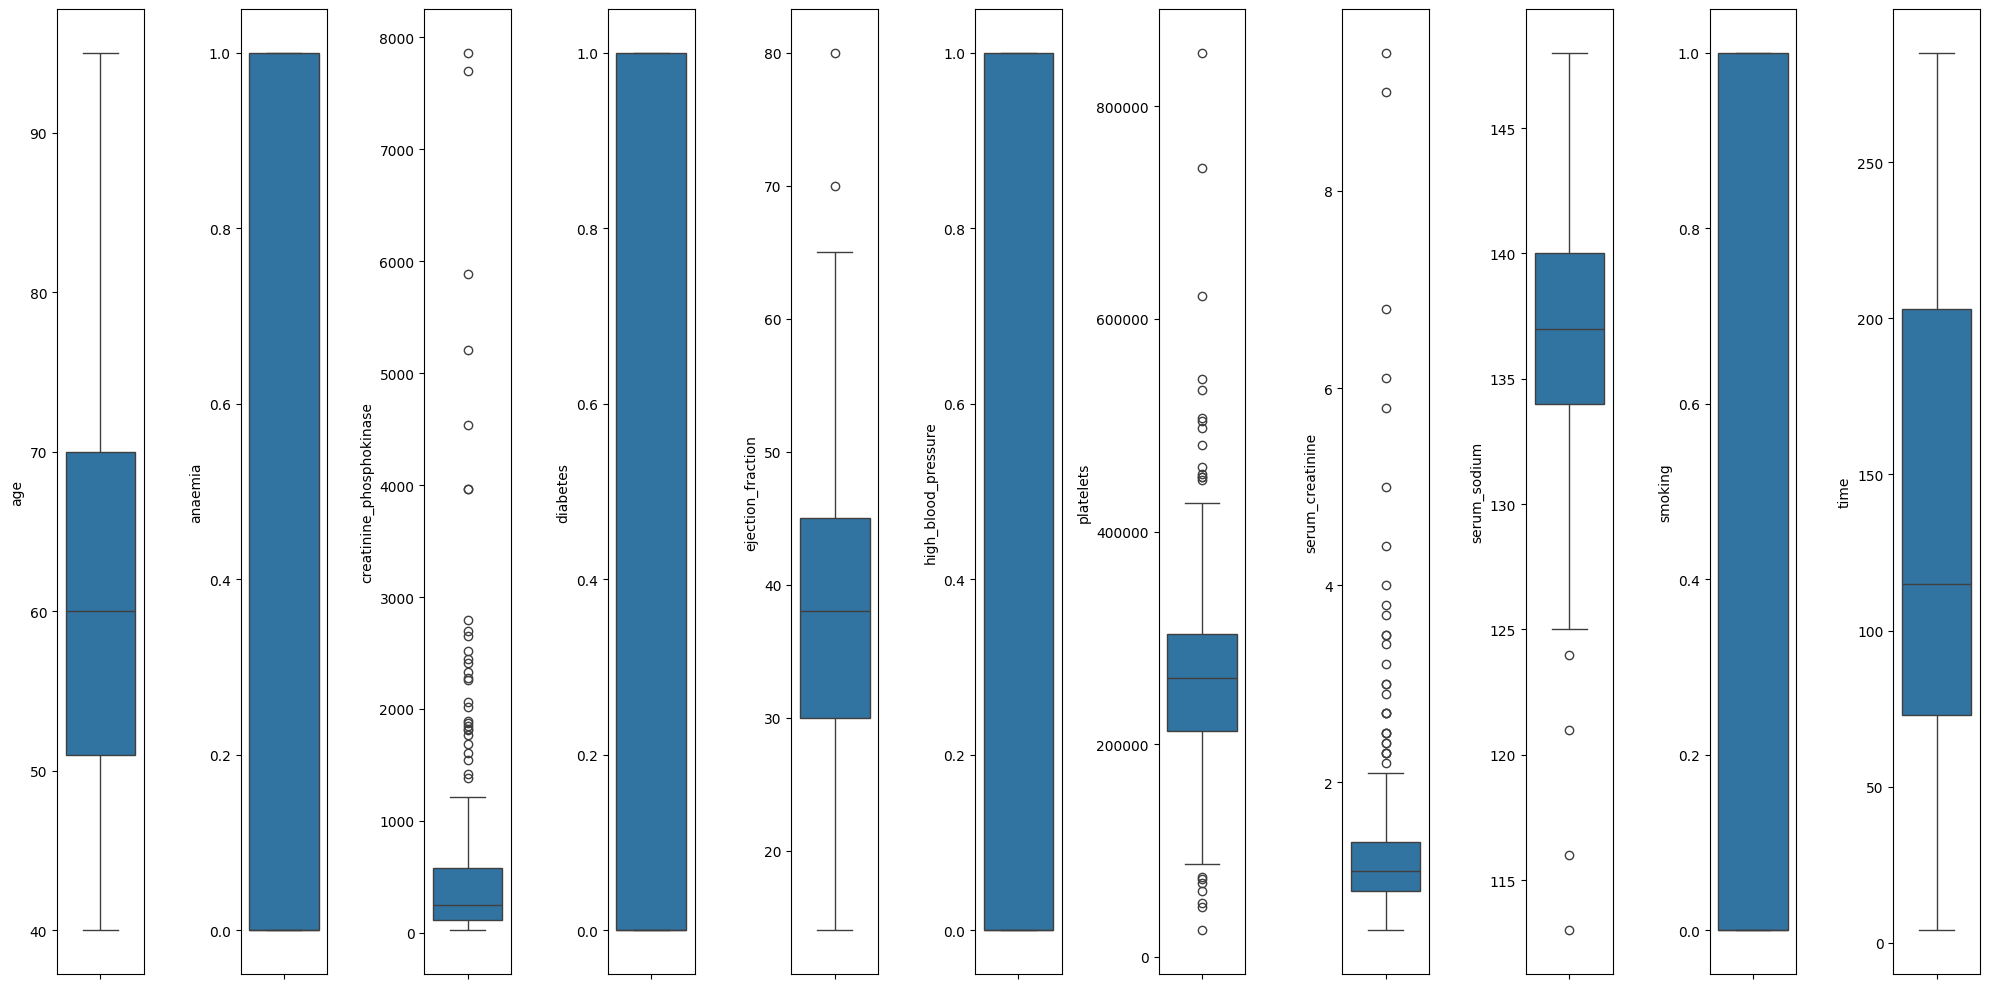

In [15]:
# seaborn - библиотека для визиализации числовых данных
import seaborn as sns
# создаем пустую фигуру размеров 20х10
fig=plt.figure(figsize=(20,10))

# цикл по всем числовым признакам (список cont)
# enumerate - добавляет индекс (позицию) текущего признака
for i, name in enumerate(cont):
    # разбиваем фигуру на 1 строку и len(cont) столбцов
    # i+1 - определяет позицию текущего графика
    ax=fig.add_subplot(1,len(cont), i+1)
    # строит boxplot (ящик с усами) для признака name по оси y
    sns.boxplot(y=df[name], ax=ax)
# подгоняем расположение графиков, чтобы они не накладывались друг на друга
fig.tight_layout()

In [16]:
# маштабирование данных с использованием медианы и межквартильного размаха (IQR)
from sklearn.preprocessing import RobustScaler
# создаем объект RobustScaler()
rs = RobustScaler()
# fit - рассчитывает медиану и межквартильный размах (IQR) по каждому признаку
# transform - масштабирует данные используя формулу X = (X - median(X)) / IQR(X)
df[cont]=rs.fit_transform(df[cont])
df.head()
# привели все числовые данные к одному диапазону для сравнения

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,sex_female,sex_male
0,0.789474,0.0,0.713212,0.0,-1.2,1.0,0.032967,1.6,-1.166667,0.0,-0.853846,0,1
1,-0.263158,0.0,16.350161,0.0,0.0,0.0,0.014923,0.0,-0.166667,0.0,-0.838462,0,1
2,0.263158,0.0,-0.223416,0.0,-1.2,0.0,-1.098901,0.4,-1.333333,1.0,-0.830769,0,1
3,-0.526316,1.0,-0.298604,0.0,-1.2,0.0,-0.571429,1.6,0.000000,0.0,-0.830769,0,1
4,0.263158,1.0,-0.193340,1.0,-1.2,0.0,0.714286,3.2,-3.500000,0.0,-0.823077,1,0


In [17]:
# выполняем обратное преобразование для проверки корректности масштабирования
rs.inverse_transform(df[cont])[:5,:]

array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
        1.3000000e+02, 0.0000000e+00, 4.0000000e+00],
       [5.5000000e+01, 0.0000000e+00, 7.8610000e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 0.0000000e+00, 6.0000000e+00],
       [6.5000000e+01, 0.0000000e+00, 1.4600000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 1.6200000e+05, 1.3000000e+00,
        1.2900000e+02, 1.0000000e+00, 7.0000000e+00],
       [5.0000000e+01, 1.0000000e+00, 1.1100000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 2.1000000e+05, 1.9000000e+00,
        1.3700000e+02, 0.0000000e+00, 7.0000000e+00],
       [6.5000000e+01, 1.0000000e+00, 1.6000000e+02, 1.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 3.2700000e+05, 2.7000000e+00,
        1.1600000e+02, 0.0000000e+00, 8.0000000e+00]])

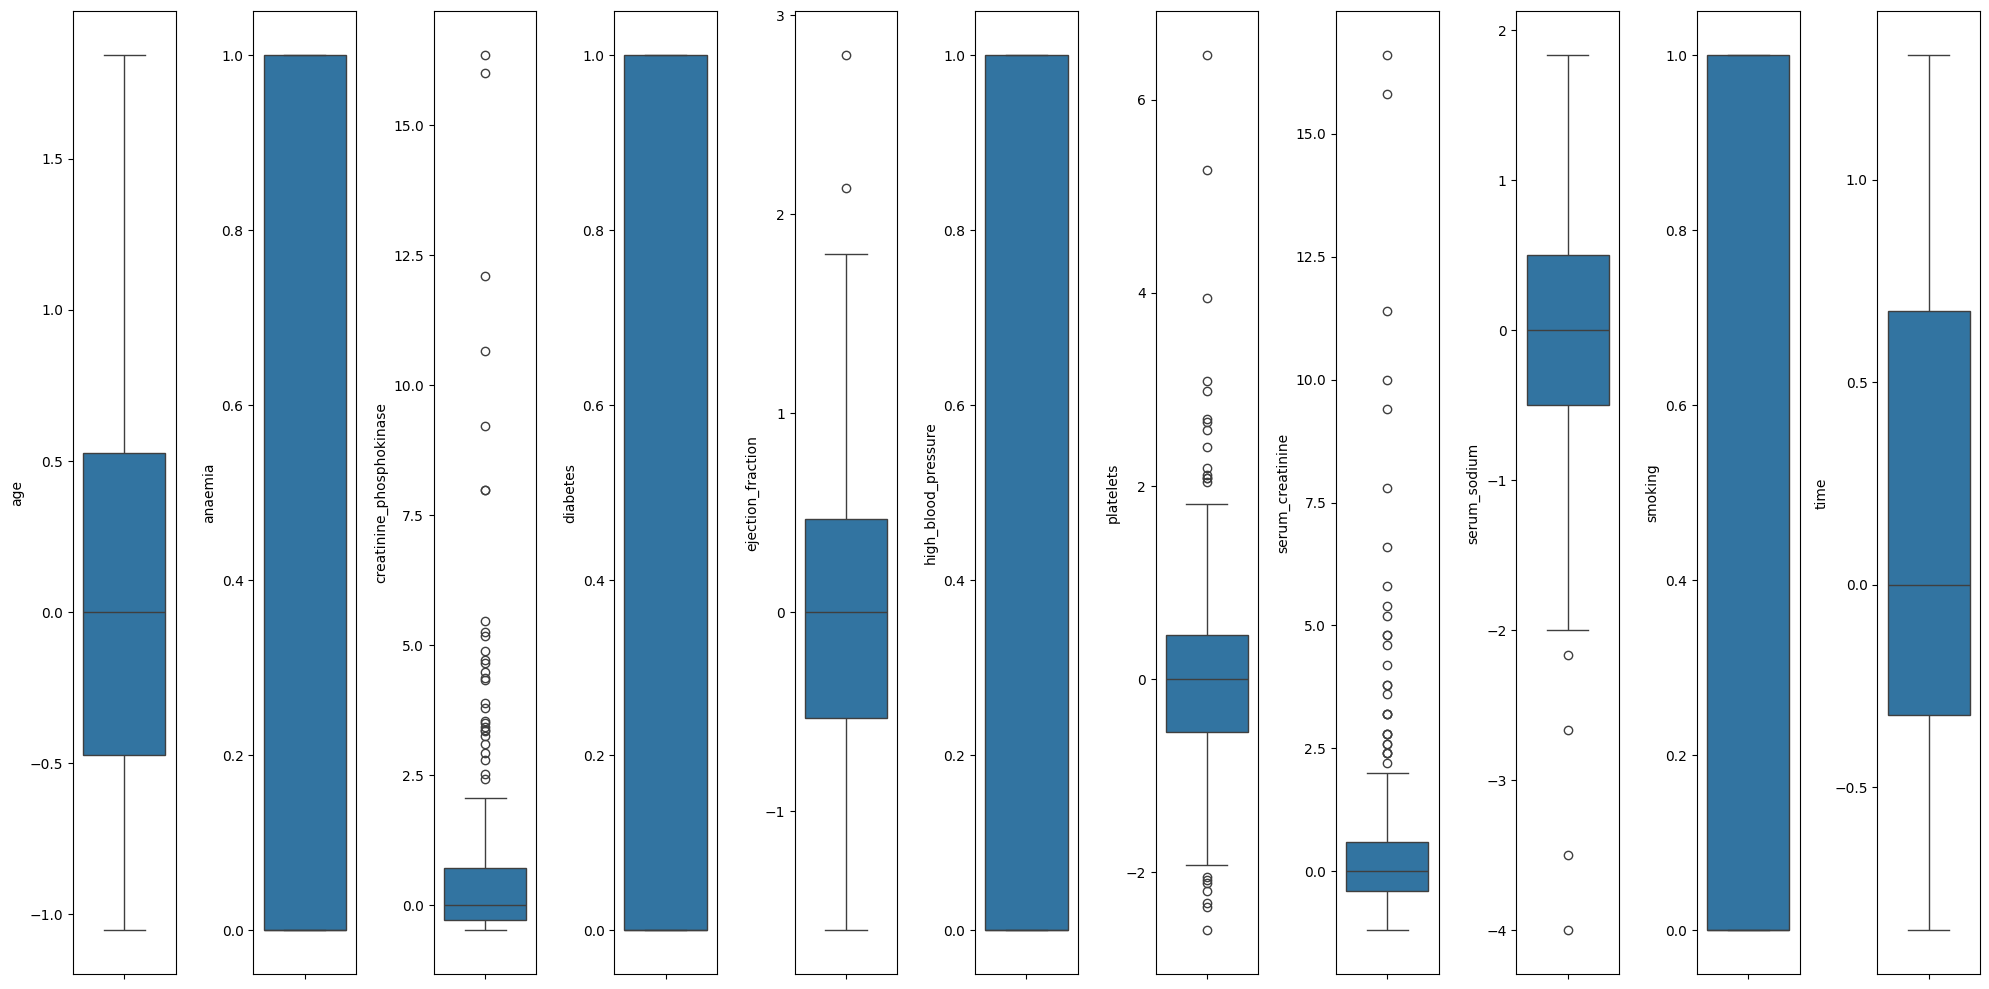

In [18]:
# повторяет код как был выше, только уже с масштабированными даными
import seaborn as sns
fig=plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [19]:
# Корреляция между числовыми признаками

# df[cont].corr() - вычисляем корреляционную матрицу для числовых признаков
corr = df[cont].corr()
# создаем цветовую палитру для визуализации
cmap = sns.diverging_palette(5, 250, as_cmap=True)

# функция для улучшения стиля таблицы (шрифт, размеры)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# добавляем цветовой градиент к таблице на основе значений корреляции
corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Корреляция непрерывных признаков")\
    .set_table_styles(magnify())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
age,1.000,0.088,-0.082,-0.101,0.060,0.093,-0.052,0.159,-0.046,0.019,-0.224
anaemia,0.088,1.000,-0.191,-0.013,0.032,0.038,-0.044,0.052,0.042,-0.107,-0.141
creatinine_phosphokinase,-0.082,-0.191,1.000,-0.010,-0.044,-0.071,0.024,-0.016,0.060,0.002,-0.009
diabetes,-0.101,-0.013,-0.010,1.000,-0.005,-0.013,0.092,-0.047,-0.090,-0.147,0.034
ejection_fraction,0.060,0.032,-0.044,-0.005,1.000,0.024,0.072,-0.011,0.176,-0.067,0.042
high_blood_pressure,0.093,0.038,-0.071,-0.013,0.024,1.000,0.050,-0.005,0.037,-0.056,-0.196
platelets,-0.052,-0.044,0.024,0.092,0.072,0.050,1.000,-0.041,0.062,0.028,0.011
serum_creatinine,0.159,0.052,-0.016,-0.047,-0.011,-0.005,-0.041,1.000,-0.189,-0.027,-0.149
serum_sodium,-0.046,0.042,0.060,-0.090,0.176,0.037,0.062,-0.189,1.000,0.005,0.088
smoking,0.019,-0.107,0.002,-0.147,-0.067,-0.056,0.028,-0.027,0.005,1.000,-0.023


In [20]:
# преобразование данных в массивы NumPy
# конвертируем DataFrame в  NumPy
# X - содержит все признаки (фичи) (матрица признаков)
X=df.values
# конвертируем столбец target (diabetes) в  NumPy
# y - содержит метки классов (вектор ответов)
y=target.values

In [21]:
from sklearn.utils.class_weight import compute_class_weight

# Преобразуем classes в numpy.ndarray
classes = np.array([0, 1])

# Расчет весов классов
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)

# Преобразуем результат в numpy массив с float32, если это необходимо
class_weights = class_weights.astype(np.float32)

# Вывод
class_weights

array([0.7364532, 1.5572916], dtype=float32)

In [22]:
# разделение на обучающую, валиданионную, тестовую выборки
from sklearn.model_selection import train_test_split
# train_test_split разделяет данные на обучающую (80%) и врЕменную dum (20%) выборку
X_train, X_dum, y_train, y_dum=train_test_split(X,y, test_size=0.2)
# train_test_split разделяет врЕменную выборку dum (20%) на тестовую и валидационную пополам (по 10%)
X_val, X_test, y_val, y_test= train_test_split(X_dum, y_dum ,test_size=0.5)

In [23]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [24]:
# проверка на наличие GPU(CUDA), если его он доступен, то выбирается, а если нет то выбирается CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

In [25]:
# Создание пользовательского класса Dataset для PyTorch

class MyDataset(Dataset):
  # Принимает данные (data) и метки (targets) и конвертирует из в тензоры
  def __init__(self, data, targets, transform=None):
      # признаки
      self.data = torch.Tensor(data)
      # метки классов
      self.targets = torch.LongTensor(targets)
      # доп преобразование если это нужно
      self.transform = transform
  # возвращаем пару (признак, метка) по индексу
  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y
  # возвращаем все метки классов
  def get_labels(self):
    return self.targets
  # количество объектов в датасете
  def __len__(self):
      return len(self.data)

In [26]:
train_dataset=MyDataset(X_train,y_train)
val_dataset=MyDataset(X_val,y_val)
test_dataset=MyDataset(X_test,y_test)

In [27]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 30
Длина валидационной выборки: 30
Длина тренировочной выборки: 239


In [28]:
train_dataset[0]

(tensor([-0.6842,  0.0000,  0.7132,  0.0000, -0.8667,  0.0000, -1.4505, -0.6000,
         -0.5000,  0.0000,  0.6615,  0.0000,  1.0000]),
 tensor(0))

In [29]:
! pip install torchsampler==0.1.1

In [30]:
from torchsampler import ImbalancedDatasetSampler
# помогает сбалансировать обучение, выбирая все классы с одинаковой вероятностью (тк модель может игнорировать редкие классы)

In [31]:
# количество объектов в каждом пакете (batch)
batch_size=16 # размер пакета
# DataLoader - позволяет батчево (пакетно) подавать данные для обучения
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=False,
                          sampler=ImbalancedDatasetSampler(train_dataset))
# shuffle=True - для валидационной и тестовой выборок включено случайное перемешивание данных (позволяет уменьшить влияние порядка объектов при оценке)
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [32]:
# Создание нейронной сети (FFNN)

# nn.Module - базовый класс PyTorch для всех моделей
class Classification_Model_FFNN(nn.Module):
  # num_inputs- количество входных признаков
  # num_classes - количество выходных классов
  def __init__(self, num_inputs, num_classes):
      super(Classification_Model_FFNN, self).__init__()
      # nn.Sequential - создание последовательности слоев нейронной сети
      self.pipe = nn.Sequential(
          # nn.Linear - полносвязный слой выполняющий линейное преобразование
          nn.Linear(num_inputs, 64, bias=False),
          # nn.ReLU6 - активационная функция (огр значения до 6)
          nn.ReLU6(inplace=True),
          # nn.BatchNorm1d - Нормализация данных для ускорения обучения и стабилизации градиентов
          nn.BatchNorm1d(64),

          nn.Linear(64, 48, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(48),

          nn.Linear(48, 32, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(32),

          nn.Linear(32, 16, bias=False),
          nn.ReLU6(inplace=True),
          nn.BatchNorm1d(16),

          nn.Linear(16, num_classes))

  def forward(self, x):
      return self.pipe(x)

In [33]:
#Инициализация модели и отправка на устройство

#создаем объект модели с 13 признаками (входы) и 2 классами (выходами)
model=Classification_Model_FFNN(13,2)
# перемещаем модель на устройство cuda или cpu
model.to(device);

In [34]:
! pip install torchinfo

In [36]:
from torchinfo import summary
# summary - показывает детальную информацию о модели (количество слоев, пареметры (весы и смещения), размеры на каждом слое)
# input_size=(1, 13) - размер входного тензора
summary(model,input_size=(1, 13))

Layer (type:depth-idx)                   Output Shape              Param #
Classification_Model_FFNN                [1, 2]                    --
├─Sequential: 1-1                        [1, 2]                    --
│    └─Linear: 2-1                       [1, 64]                   832
│    └─ReLU6: 2-2                        [1, 64]                   --
│    └─BatchNorm1d: 2-3                  [1, 64]                   128
│    └─Linear: 2-4                       [1, 48]                   3,072
│    └─ReLU6: 2-5                        [1, 48]                   --
│    └─BatchNorm1d: 2-6                  [1, 48]                   96
│    └─Linear: 2-7                       [1, 32]                   1,536
│    └─ReLU6: 2-8                        [1, 32]                   --
│    └─BatchNorm1d: 2-9                  [1, 32]                   64
│    └─Linear: 2-10                      [1, 16]                   512
│    └─ReLU6: 2-11                       [1, 16]                   --
│    └

In [37]:
# Настройка функции потерь и оптимизатора

# nn.CrossEntropyLoss - функция потерь для задачи классификации
# weight=torch.tensor(class_weights - учитывает веса классов для дисбалансированных данных
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))
#criterion = nn.CrossEntropyLoss()
# optim.Adam - оптимизатор - используется для обновления параметров модели
optimizer = optim.Adam(model.parameters(), weight_decay=0.1)

In [38]:
from tqdm import tqdm

In [39]:
# Функция для рассчета точности

def accuracy(predictions, labels):
    # torch.argmax(predictions, dim=1) - выбирает индекс максимального значения вдоль оси dim = 1(выходной класс модели)
    classes = torch.argmax(predictions, dim=1)
    # classes == labels - сравнивает предсказанные классы с истинными метками
    # преобразуем реультат в float
    # torch.mean - вычисляет среднее значение
    return torch.mean((classes == labels).float())

In [40]:
# Функция обучения модели

train_losses=[]
train_accs=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # включаем режим обучения (веса модели можно обновлять)
  running_loss= 0. # накопленная ошибка за эпоху
  running_acc = 0. # накопленная точность за эпоху
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # загружаем данные на устройство (распаковываем пакеты)
      optimizer.zero_grad() # обнуляем градиенты для нового шага обучения
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # вычисляем функцию потерь
      loss.backward() # обратное распространение ошибки для расчета градиентов
      optimizer.step() # итерация алгоритма оптимизации: обновление весов модели

      running_loss += loss.item() # добавляем текущую ошибку к общей
      running_acc += accuracy(outputs,targets) # добавляем текущую точность к общей

    # среднее значение и точность за эпоху
  train_loss=running_loss/len(train_loader)
  train_acc=running_acc/len(train_loader)

    # сохраняем значения для последующего анализа
  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print('Средняя ошибка модели на тренировочной выборке: %.4f'%(train_loss)+'   Средняя точность модели на тренировочной выборке: %.4f'%(train_acc))

In [41]:
val_losses=[]
val_accs=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # включаем режим валидации, веса модели заморожены
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad(): # отключаем расчет градиентов для ускорения
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs) # прямой проход: предсказания модели
            loss=criterion(outputs,targets) # вычисляем ошибку

            running_loss += loss.item() # добавляем текущую ошибку к общей
            running_acc += accuracy(outputs,targets) # добавляем текущую точность к общей

        # среднее значение и точность за эпоху
        val_loss=running_loss/len(val_loader)
        val_acc=running_acc/len(val_loader)

        # сохраняем значения для последующего анализа
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Средняя ошибка модели на валидационной выборке: %.4f'%(val_loss)+'   Средняя точность модели на валидационной выборке: %.4f'%(val_acc))

In [42]:
# класс для ранней остановки


class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience # количество эпох в течение которых допустимо ухудшение
        self.min_delta = min_delta # минимальное улучшение для "лучшего" результата
        self.counter = 0 # счетчик ухудшений
        self.min_validation_loss = float('inf') # минимальная ошибка на валидации

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0 # сбрасываем счетчик ухудшений
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1 # увеличиваем счетчик ухудшений
            if self.counter >= self.patience:
                return True # прерываем обучение
        return False

In [43]:
max_epochs=100
best_acc=0.0
early_stopper = EarlyStopper(patience=5, min_delta=0.1)
for epoch in range(1,max_epochs+1):
    train(model,epoch) # запускаем обучение
    val(model,epoch) # запускаем валидацию
    # сохранение лучшей модели
    if val_accs[-1] > best_acc:
       torch.save(model, 'best-model.pt') # сохраняем модель с лучшей точностью
       best_acc = val_accs[-1]
    # ранняя остановка
    if early_stopper.early_stop(val_losses[-1]):
      break


Epoch : 1


100%|██████████| 15/15 [00:00<00:00, 135.07it/s]


Средняя ошибка модели на тренировочной выборке: 0.6497   Средняя точность модели на тренировочной выборке: 0.6397

Epoch : 1


100%|██████████| 2/2 [00:00<00:00, 246.14it/s]


Средняя ошибка модели на валидационной выборке: 0.7131   Средняя точность модели на валидационной выборке: 0.2768

Epoch : 2


100%|██████████| 15/15 [00:00<00:00, 347.73it/s]


Средняя ошибка модели на тренировочной выборке: 0.4783   Средняя точность модели на тренировочной выборке: 0.7533

Epoch : 2


100%|██████████| 2/2 [00:00<00:00, 792.42it/s]


Средняя ошибка модели на валидационной выборке: 0.6459   Средняя точность модели на валидационной выборке: 0.5268

Epoch : 3


100%|██████████| 15/15 [00:00<00:00, 355.73it/s]


Средняя ошибка модели на тренировочной выборке: 0.4058   Средняя точность модели на тренировочной выборке: 0.8147

Epoch : 3


100%|██████████| 2/2 [00:00<00:00, 759.91it/s]


Средняя ошибка модели на валидационной выборке: 0.5717   Средняя точность модели на валидационной выборке: 0.7009

Epoch : 4


100%|██████████| 15/15 [00:00<00:00, 252.22it/s]


Средняя ошибка модели на тренировочной выборке: 0.3454   Средняя точность модели на тренировочной выборке: 0.8531

Epoch : 4


100%|██████████| 2/2 [00:00<00:00, 641.58it/s]


Средняя ошибка модели на валидационной выборке: 0.5831   Средняя точность модели на валидационной выборке: 0.7232

Epoch : 5


100%|██████████| 15/15 [00:00<00:00, 233.04it/s]


Средняя ошибка модели на тренировочной выборке: 0.3844   Средняя точность модели на тренировочной выборке: 0.8283

Epoch : 5


100%|██████████| 2/2 [00:00<00:00, 479.62it/s]


Средняя ошибка модели на валидационной выборке: 0.5781   Средняя точность модели на валидационной выборке: 0.7277

Epoch : 6


100%|██████████| 15/15 [00:00<00:00, 234.29it/s]


Средняя ошибка модели на тренировочной выборке: 0.3221   Средняя точность модели на тренировочной выборке: 0.8703

Epoch : 6


100%|██████████| 2/2 [00:00<00:00, 740.45it/s]


Средняя ошибка модели на валидационной выборке: 0.5459   Средняя точность модели на валидационной выборке: 0.7679

Epoch : 7


100%|██████████| 15/15 [00:00<00:00, 345.61it/s]


Средняя ошибка модели на тренировочной выборке: 0.3784   Средняя точность модели на тренировочной выборке: 0.8164

Epoch : 7


100%|██████████| 2/2 [00:00<00:00, 332.05it/s]


Средняя ошибка модели на валидационной выборке: 0.5287   Средняя точность модели на валидационной выборке: 0.7634

Epoch : 8


100%|██████████| 15/15 [00:00<00:00, 253.11it/s]


Средняя ошибка модели на тренировочной выборке: 0.2817   Средняя точность модели на тренировочной выборке: 0.8786

Epoch : 8


100%|██████████| 2/2 [00:00<00:00, 628.03it/s]


Средняя ошибка модели на валидационной выборке: 0.5700   Средняя точность модели на валидационной выборке: 0.6607

Epoch : 9


100%|██████████| 15/15 [00:00<00:00, 334.89it/s]


Средняя ошибка модели на тренировочной выборке: 0.2486   Средняя точность модели на тренировочной выборке: 0.8833

Epoch : 9


100%|██████████| 2/2 [00:00<00:00, 528.38it/s]


Средняя ошибка модели на валидационной выборке: 0.5956   Средняя точность модели на валидационной выборке: 0.7277

Epoch : 10


100%|██████████| 15/15 [00:00<00:00, 341.15it/s]


Средняя ошибка модели на тренировочной выборке: 0.3019   Средняя точность модели на тренировочной выборке: 0.8747

Epoch : 10


100%|██████████| 2/2 [00:00<00:00, 746.12it/s]


Средняя ошибка модели на валидационной выборке: 0.4825   Средняя точность модели на валидационной выборке: 0.7946

Epoch : 11


100%|██████████| 15/15 [00:00<00:00, 312.55it/s]


Средняя ошибка модели на тренировочной выборке: 0.2551   Средняя точность модели на тренировочной выборке: 0.8789

Epoch : 11


100%|██████████| 2/2 [00:00<00:00, 724.34it/s]


Средняя ошибка модели на валидационной выборке: 0.4725   Средняя точность модели на валидационной выборке: 0.7366

Epoch : 12


100%|██████████| 15/15 [00:00<00:00, 340.90it/s]


Средняя ошибка модели на тренировочной выборке: 0.2087   Средняя точность модели на тренировочной выборке: 0.9164

Epoch : 12


100%|██████████| 2/2 [00:00<00:00, 595.02it/s]


Средняя ошибка модели на валидационной выборке: 0.4789   Средняя точность модели на валидационной выборке: 0.7768

Epoch : 13


100%|██████████| 15/15 [00:00<00:00, 337.85it/s]


Средняя ошибка модели на тренировочной выборке: 0.2570   Средняя точность модели на тренировочной выборке: 0.8914

Epoch : 13


100%|██████████| 2/2 [00:00<00:00, 747.98it/s]


Средняя ошибка модели на валидационной выборке: 0.4728   Средняя точность модели на валидационной выборке: 0.8304

Epoch : 14


100%|██████████| 15/15 [00:00<00:00, 319.61it/s]


Средняя ошибка модели на тренировочной выборке: 0.2377   Средняя точность модели на тренировочной выборке: 0.9081

Epoch : 14


100%|██████████| 2/2 [00:00<00:00, 750.05it/s]


Средняя ошибка модели на валидационной выборке: 0.4653   Средняя точность модели на валидационной выборке: 0.7991

Epoch : 15


100%|██████████| 15/15 [00:00<00:00, 341.84it/s]


Средняя ошибка модели на тренировочной выборке: 0.2433   Средняя точность модели на тренировочной выборке: 0.8906

Epoch : 15


100%|██████████| 2/2 [00:00<00:00, 787.22it/s]


Средняя ошибка модели на валидационной выборке: 0.5846   Средняя точность модели на валидационной выборке: 0.7946

Epoch : 16


100%|██████████| 15/15 [00:00<00:00, 298.15it/s]


Средняя ошибка модели на тренировочной выборке: 0.2777   Средняя точность модели на тренировочной выборке: 0.8661

Epoch : 16


100%|██████████| 2/2 [00:00<00:00, 836.02it/s]


Средняя ошибка модели на валидационной выборке: 0.5840   Средняя точность модели на валидационной выборке: 0.7009

Epoch : 17


100%|██████████| 15/15 [00:00<00:00, 310.78it/s]


Средняя ошибка модели на тренировочной выборке: 0.2296   Средняя точность модели на тренировочной выборке: 0.9125

Epoch : 17


100%|██████████| 2/2 [00:00<00:00, 477.82it/s]


Средняя ошибка модели на валидационной выборке: 0.4853   Средняя точность модели на валидационной выборке: 0.7768

Epoch : 18


100%|██████████| 15/15 [00:00<00:00, 239.25it/s]


Средняя ошибка модели на тренировочной выборке: 0.2419   Средняя точность модели на тренировочной выборке: 0.8703

Epoch : 18


100%|██████████| 2/2 [00:00<00:00, 468.90it/s]


Средняя ошибка модели на валидационной выборке: 0.5790   Средняя точность модели на валидационной выборке: 0.7009

Epoch : 19


100%|██████████| 15/15 [00:00<00:00, 238.09it/s]


Средняя ошибка модели на тренировочной выборке: 0.2484   Средняя точность модели на тренировочной выборке: 0.9000

Epoch : 19


100%|██████████| 2/2 [00:00<00:00, 695.17it/s]


Средняя ошибка модели на валидационной выборке: 0.6229   Средняя точность модели на валидационной выборке: 0.7009

Epoch : 20


100%|██████████| 15/15 [00:00<00:00, 198.62it/s]


Средняя ошибка модели на тренировочной выборке: 0.2412   Средняя точность модели на тренировочной выборке: 0.9033

Epoch : 20


100%|██████████| 2/2 [00:00<00:00, 718.63it/s]


Средняя ошибка модели на валидационной выборке: 0.5607   Средняя точность модели на валидационной выборке: 0.7277

Epoch : 21


100%|██████████| 15/15 [00:00<00:00, 261.77it/s]


Средняя ошибка модели на тренировочной выборке: 0.2141   Средняя точность модели на тренировочной выборке: 0.9203

Epoch : 21


100%|██████████| 2/2 [00:00<00:00, 604.37it/s]

Средняя ошибка модели на валидационной выборке: 0.6091   Средняя точность модели на валидационной выборке: 0.7277


In [44]:
# лучшая достигнутая точность на валидационной выборке

best_acc

tensor(0.8304)

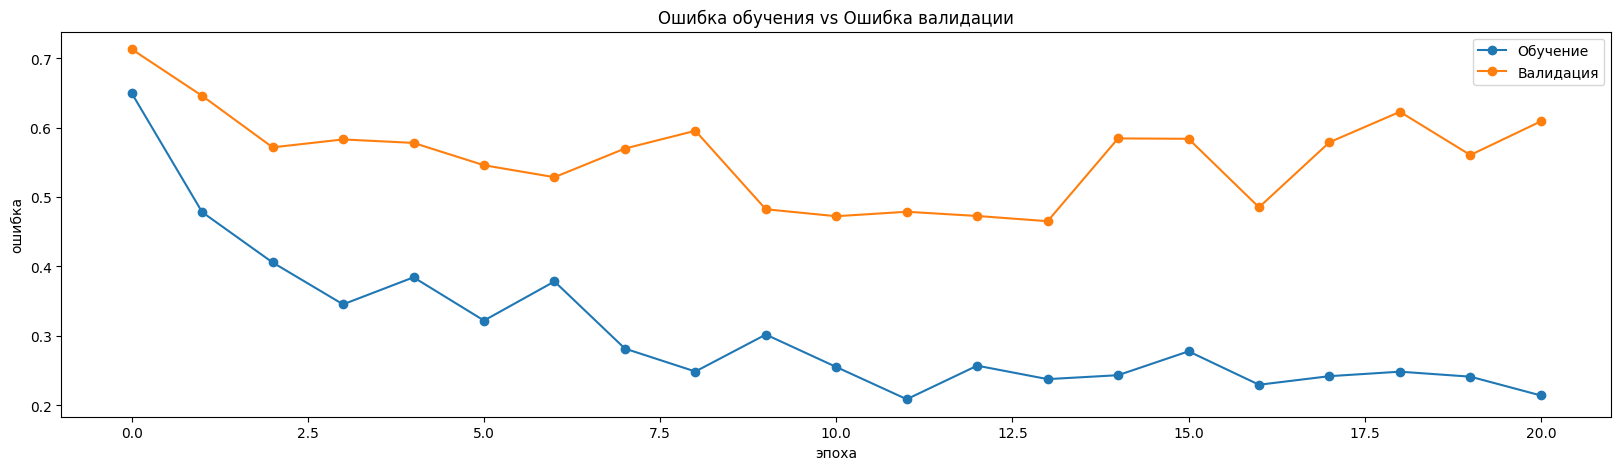

In [45]:
# график ошибки обучения и валидации

plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

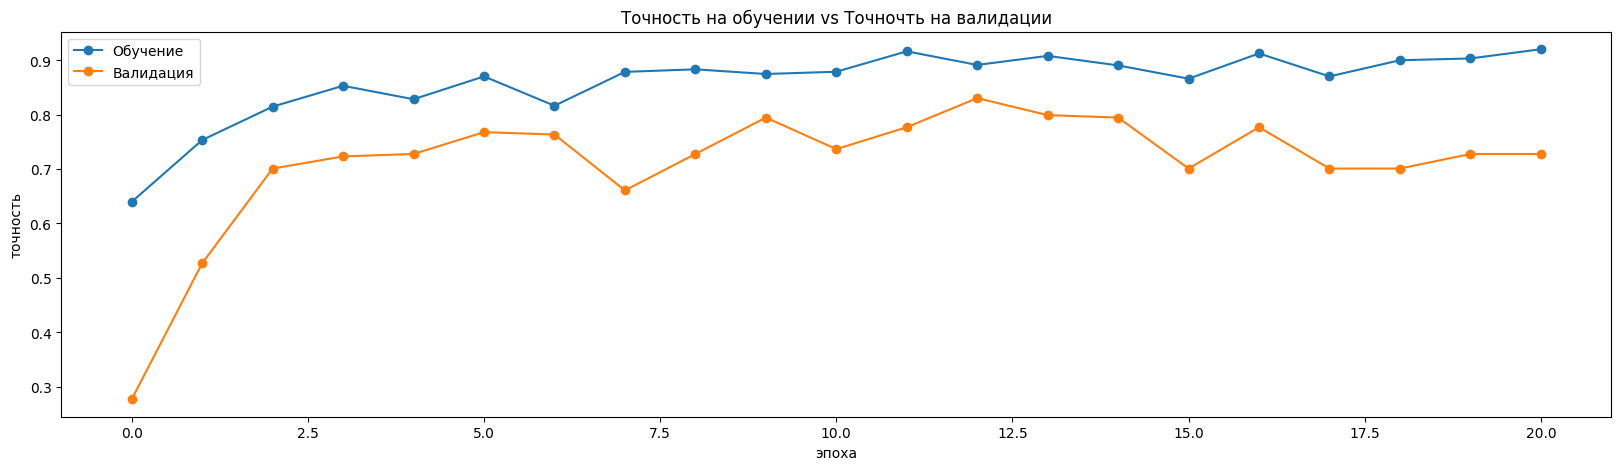

In [46]:
# график точности обучения и валидации

plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_accs,'-o')
plt.plot(val_accs,'-o')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend(['Обучение','Валидация'])
plt.title('Точность на обучении vs Точночть на валидации')
plt.show()

In [47]:
# загрузка лучшей модели

model = torch.load('best-model.pt');
model.eval();

<ipython-input-47-8ed965894ae5>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('best-model.pt');


In [48]:
# получение предсказаний на тестовой выборке

preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(test_loader):
    inputs, targets=data[0].to(device),data[1].to(device) # загружаем данные
    outputs=model(inputs) # предсказания модели
    targets=targets.to('cpu').numpy() # переводим метки в CPU
    pred = outputs.data.max(1, keepdim=True)[1] # находим класс с максимальной вероятностью
    pred = pred.to('cpu').numpy() # переводим предсказания в CPU
    trgts.append(targets) # сохраняем реальные метки
    preds.append(pred) # сохраняем предсказания

100%|██████████| 2/2 [00:00<00:00, 344.84it/s]


In [49]:
# объединение предсказаний и реальных меток

# распаковываем вложенные циклы в один плоский список
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]
targets=np.array(targets)
predictions=np.array(predictions)

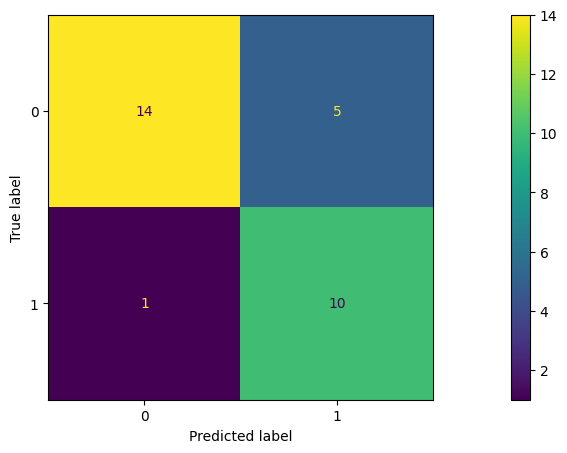

In [50]:
# матрица ошибок

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
# confusion_matrix  создает матрицу ошибок которая показывает истинные и предсказанные классы
cm = confusion_matrix(targets, predictions)
# визуализируем матрицу как график
ConfusionMatrixDisplay(cm).plot()

In [51]:
# вычисление f1 меры - среднее гармоническое между точностью и полнотой

f1_score(targets, predictions,average='micro')

0.8